Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3840 - val_loss: 0.1875
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1777 - val_loss: 0.1518
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1480 - val_loss: 0.1330
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1310 - val_loss: 0.1211
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1202 - val_loss: 0.1136
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1133 - val_loss: 0.1082
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1082 - val_loss: 0.1042
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1044 - val_loss: 0.1009
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.1015 - val_loss: 0.0983
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0989 - val_loss: 0.0963
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


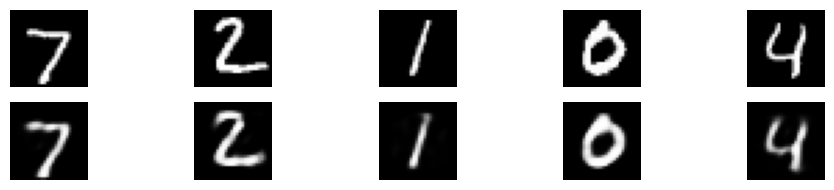

In [3]:
# Deep Learning Assignment
# Author: Arvind
# University: University of Central Missouri

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix, classification_report
import string
import random

# Q1: Basic Autoencoder
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Encoder-Decoder Architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plot original vs reconstructed
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10, 2))
for i in range(5):
    # original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    # reconstructed
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.savefig("q1_reconstruction.png")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1912 - val_loss: 0.1354
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1352 - val_loss: 0.1305
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1308 - val_loss: 0.1280
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1289 - val_loss: 0.1264
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1274 - val_loss: 0.1255
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1265 - val_loss: 0.1249
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1257 - val_loss: 0.1243
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1253 - val_loss: 0.1240
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1248 - val_loss: 0.1238
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1243 - val_loss: 0.1235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


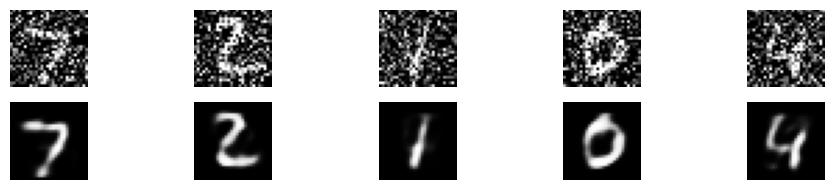

In [4]:
# Q2: Denoising Autoencoder
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

denoising_autoencoder = Model(input_img, decoded)  # reuse same model arch
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
denoising_autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot noisy vs denoised
decoded_noisy = denoising_autoencoder.predict(x_test_noisy)
plt.figure(figsize=(10, 2))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.savefig("q2_denoising.png")